# Geodatenanalyse 2: Termin 3 - Machine Learning Algorithmen

### Aufbau:
- Importieren von Daten
- Binäre Klassifikation
  - Support Vector Machines (SVM)
  - RandomForests (RF)
- Multiklassen Klassifikatin
  - Support Vector Machines (SVM)
  - RandomForests (RF)
- Regression
  - K-Means Clustering
  - Principal Component Analysis (PCA)
  - Combination PCA + K-means Clustering
- Bonusaufgabe


### Laden der Bibliotheken

In [1]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Methods
from sklearn.svm import SVC # support vector classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR # support vector regression
from sklearn.ensemble import RandomForestRegressor

# Adv
from sklearn.pipeline import Pipeline

## 1.  Binäre Klassifikation

#### Datensatz:

In [2]:
# Einladen der Daten
filename = 'gwdata_2005.csv'
dataset = pd.read_csv(filename, delimiter=';', encoding="latin1")#, index_col=0)
dataset.head()

,GWNum,Messstelle,Ca,Cl,DOC,LF_mS_m,K,Mg,Na,NO3,...,SiO2,U,PSM,Rechtswert,Hochwert,Aquifer_kz,Aquifer,Aquifer2,landuse,landuse_num
0,1/022-9,"QSS 1+2 Hertingerquelle Hertingen, Bad Bellingen",132.0,5.8,1.10,56.6,0.5,8.8,3.8,12.4,...,8.9,0.00025,0.0,3395475,5288420,31,MALM WEIÿJURA (SCHW?BISCHE ALB),Upper Jurassic,no_agr,0
1,1/117-3,"QF Krebsbrunnenquelle, Ettenheim",15.2,2.4,0.25,11.1,1.4,4.3,1.4,4.5,...,10.7,0.00025,0.0,3419400,5345550,81,BUNTSANDSTEIN,Lower Triassic,no_agr,0
2,1/120-8,"QF 2 Kleislewaldquelle Zastler, Oberried",5.2,1.1,0.30,4.7,0.6,1.0,3.4,4.0,...,16.0,0.00025,0.0,3423200,5309100,91,KRISTALLIN (SCHWARZWALD),Crystalline Basement,no_agr,0
3,1/121-0,"QF Stollenquelle Hinteres Elend, Mnstertal",7.4,1.8,0.20,9.4,0.7,1.2,3.1,6.4,...,18.6,0.00025,0.0,3413785,5303338,91,KRISTALLIN (SCHWARZWALD),Crystalline Basement,no_agr,0
4,1/162-8,"TB Rathausplatz, Hgelsheim",85.0,55.8,0.85,58.5,7.7,4.2,23.6,18.2,...,12.3,0.00025,0.0,3434775,5407050,4,QUART?R EISZEITL.KIESE+SANDE (OBERRHEINGRABEN),Quaternary URG,no_agr,0


In [3]:
# Preprocessing
dataset_cleaned = dataset.dropna(axis=0, how='any')
mydata = dataset_cleaned.drop(['GWNum','Messstelle','Rechtswert', 'Hochwert', 'Aquifer','Aquifer2','landuse'], axis=1)
mydata.head()

,Ca,Cl,DOC,LF_mS_m,K,Mg,Na,NO3,pH,SO4,SiO2,U,PSM,Aquifer_kz,landuse_num
0,132.0,5.8,1.10,56.6,0.5,8.8,3.8,12.4,6.92,15.6,8.9,0.00025,0.0,31,0
1,15.2,2.4,0.25,11.1,1.4,4.3,1.4,4.5,6.78,2.0,10.7,0.00025,0.0,81,0
2,5.2,1.1,0.30,4.7,0.6,1.0,3.4,4.0,6.69,4.0,16.0,0.00025,0.0,91,0
3,7.4,1.8,0.20,9.4,0.7,1.2,3.1,6.4,6.96,3.4,18.6,0.00025,0.0,91,0
4,85.0,55.8,0.85,58.5,7.7,4.2,23.6,18.2,7.25,23.1,12.3,0.00025,0.0,4,0


In [4]:
# Set seed for reproducability
seed = 42

# Aufteilen der Daten in Trainings- und Testdaten
X = mydata.drop(columns='landuse_num') # Input variables
Y = mydata.landuse_num   # Target variable
test_size = 0.20  #Anteil Testdaten 20%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## 1.1 Support Vector Machine (SVM)

In [5]:
seed = 42 # Seed damit Ergebnisse reproduzierbar
scoring = 'accuracy' # Festlegen einer Metrik für Kreuzvalidierung
num_folds = 10

In [6]:
# SVM unscaled
svm = SVC(kernel='rbf', gamma='auto') # Erstellen des Modells 

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) # Definieren der K-Folds CV 
# Berechnung des CV-Scores (eigentliche Modellierung)
cv_svm = cross_val_score(svm, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%f (%f)" % (cv_svm.mean(), cv_svm.std())
print('SVM Accuracy :', msg)

SVM Accuracy : 0.620795 (0.036189)


In [7]:
# SVM scaled
svm_sc = Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_svm_sc = cross_val_score(svm_sc, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%f (%f)" % (cv_svm_sc.mean(), cv_svm_sc.std())
print('SVM(scaled) Accuracy: ', msg)

SVM(scaled) Accuracy:  0.682631 (0.023280)


## 1.2 Random Forest (RF)

In [8]:
rf = RandomForestClassifier()

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cv_rf = cross_val_score(rf, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%f (%f)" % (cv_rf.mean(), cv_rf.std())
print('RF Accuracy: ', msg)

RF Accuracy:  0.757845 (0.022001)


### Comparison 

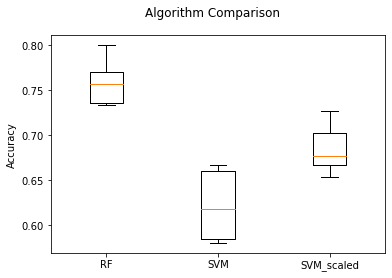

In [9]:
results = []
results.append(cv_rf)
results.append(cv_svm)
results.append(cv_svm_sc)

# Plotten
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(['RF', 'SVM', 'SVM_scaled'])
ax.set_ylabel('Accuracy')
plt.show()

### Test best model

In [10]:
# Make predictions on test dataset
# Chose the best model for that
best = RandomForestClassifier() # define RF
best.fit(X_train, Y_train) # trainieren des Modells
predictions = best.predict(X_test) # Vorhersage der Y_test Werte
# Berechnung der Metriken für vorhergesagt Werte 
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7526595744680851
[[200  24]
 [ 69  83]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       224
           1       0.78      0.55      0.64       152

    accuracy                           0.75       376
   macro avg       0.76      0.72      0.73       376
weighted avg       0.76      0.75      0.74       376



# 2. Multiklassen Klassifikation
Führt eine Multiklassen-Klassfikation mit dem Iris(Schwertlilien)-Datensatz durch und vergleiche die Ergebnisse verschiedener Methoden miteinander.

Datensatz: 

4 Input-Features: Sepal Length, Sepal Width, Petal Length and Petal Width --> Sepal = Kelchblatt; Petal = Blütenblatt

Target: 3 Arten von Schwertlilien (setosa, versicolor, virginica)

Ps: Wenn ihr eine Zelle "blau" ausgewählt habt könnt ihr wenn ihr "a" oder "b" drückt eine neue Zelle ober- bzw. unterhalb einfügen.

In [11]:
from sklearn.datasets import load_iris
data = load_iris()

## 3 Regression
Führe eine Regression mit dem Beton-Datensatz durch, vergleiche die Ergebnisse verschiedener Methoden (SVM, RF) miteinander und werte eine Methoden mit verchiedene Metriken aus.

In [12]:
data = pd.read_csv('Concrete_Data.csv', sep=';')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 3.1  K-Means Clustering

In [13]:
from sklearn.cluster import KMeans # K-mean Clustering Algorithmus von Sklearn
X = load_iris()['data'] # Iris Daten (ohne Target)

In [14]:
# defining the kmeans function with number of cluster
kmeans = KMeans(n_clusters=2)

# fitting the k means algorithm on  data
kmeans.fit(X)

KMeans(n_clusters=2)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

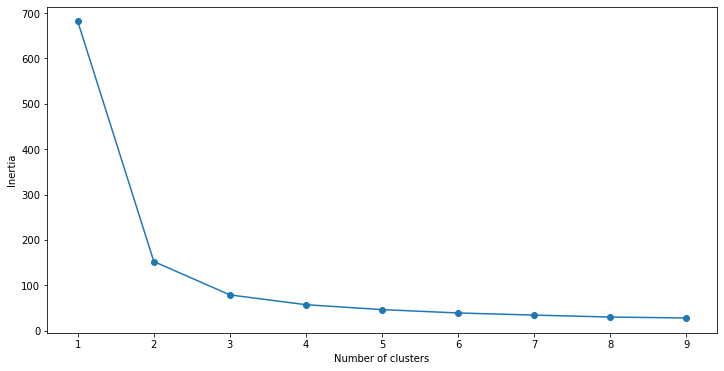

In [15]:
# Find number of cluster with elbow-curve
metric = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(X)
    metric.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'Metric':metric})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Metric'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## 3.2 PCA

In [16]:
from sklearn.decomposition import PCA # PCA Algorithmus von Sklearn
# Iris Daten
X = load_iris()['data']
color = load_iris()['target'] # Targets dienen zum plotten

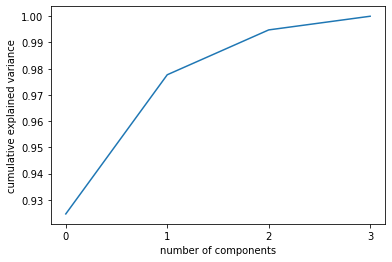

In [17]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks([0,1,2,3])
plt.ylabel('cumulative explained variance');

original shape:  (150, 4)
transformed shape: (150, 3)


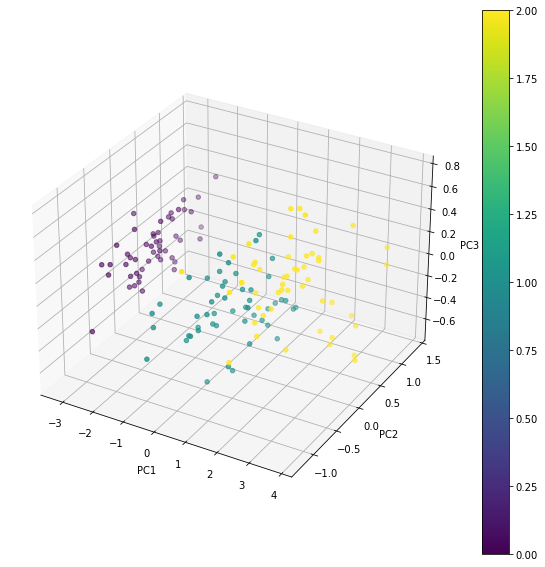

In [18]:
# PCA um die Anzahl der Feature von 4 auf 3 zu reduzieren
# ermöglicht plotten 
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

#color=X_pca.PC1
pnt3d=ax.scatter(X_pca.PC1,X_pca.PC2,X_pca.PC3,c=color)
cbar=plt.colorbar(pnt3d)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### 3.3 Combination PCA + K-means Clustering

original shape:  (150, 4)
transformed shape: (150, 3)


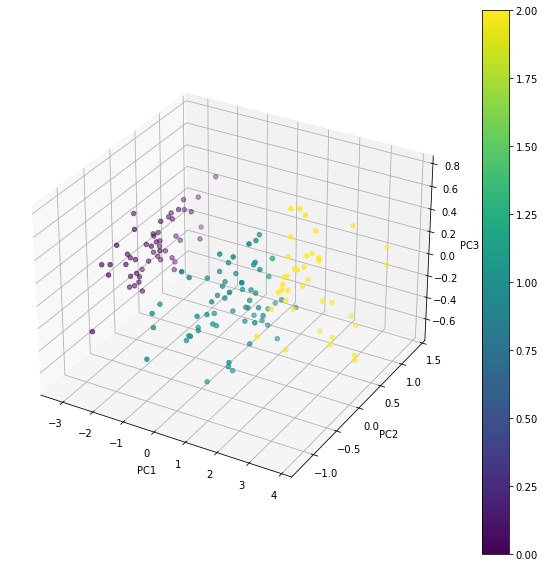

In [19]:
# Load Data
X = load_iris()['data']
color = load_iris()['target']

# PCA 
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

# Clusertung new data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)


fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

pnt3d=ax.scatter(X_pca.PC1,X_pca.PC2,X_pca.PC3,c=pred)
cbar=plt.colorbar(pnt3d)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# 4 Bonus

RF: 0.754508 (0.022942)
ScaledRF: 0.756494 (0.021221)
SVM: 0.620795 (0.036189)
ScaledSVM: 0.682631 (0.023280)


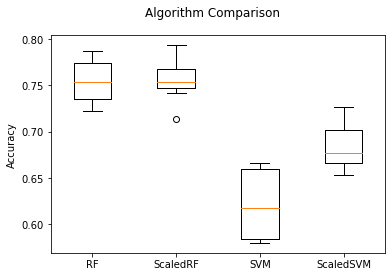

In [20]:
# Complete run for multiple Methods
# Use Pipeline for
# Standardizing the dataset
scoring='accuracy'
num_folds = 10
seed = 42

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
models.append(('SVM', SVC(gamma='auto', kernel='rbf')))
models.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms in boxplot

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show()